In [28]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
# import psycopg2
import json

### 1 - Aquisição dos dados através do postgresql

In [33]:
credenciais = json.load(open('./credentials.json', 'r'))

In [37]:
# psycopg2.connect(**credenciais)

NameError: name 'psycopg2' is not defined

### 1 - Aquisição dos dados

In [2]:
df_exemplo = pd.read_csv('./data/example_data1.csv')
df_exemplo.columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4']
final_df = df_exemplo.copy()

In [3]:
df_exemplo.head()

,feature_1,feature_2,feature_3,feature_4
0,13.899301,-2.537226,-1.734238,4.513731
1,11.320160,-1.738549,1.541563,6.338467
2,13.052523,0.693260,-1.713118,7.807565
3,-1.959464,0.836193,2.878355,-1.819329
4,14.832988,-1.751945,0.344244,3.216379


### 2 - Análise dos dados

<AxesSubplot:>

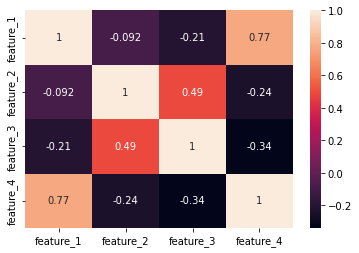

In [4]:
sns.heatmap(df_exemplo.corr(), annot=True)

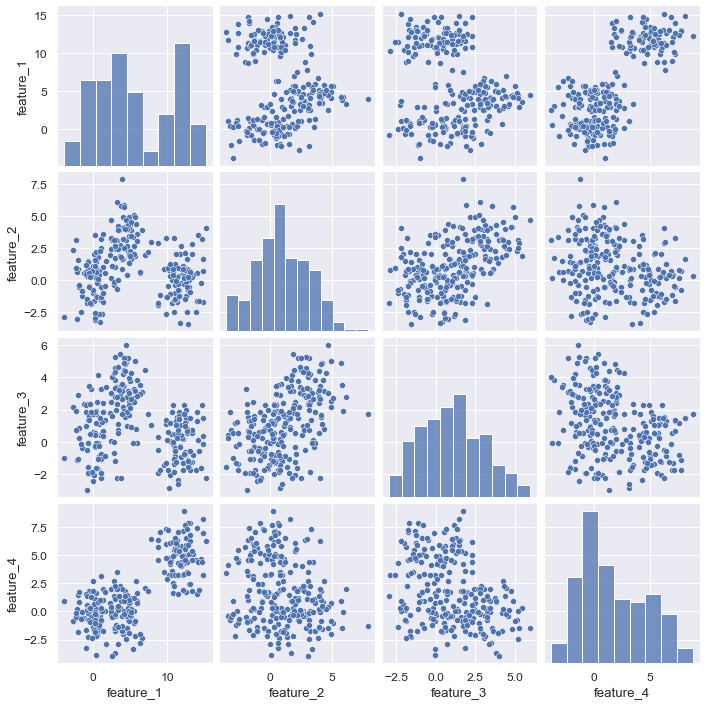

In [5]:
sns.set(font_scale=1.1)
sns.pairplot(df_exemplo)

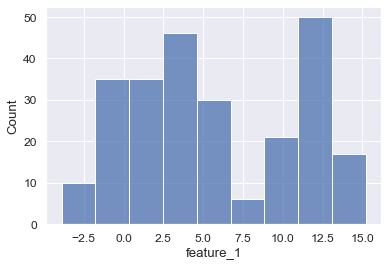

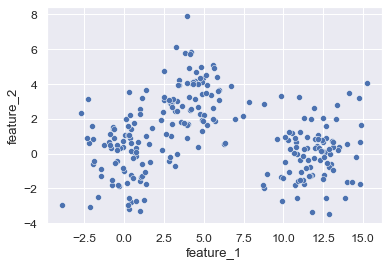

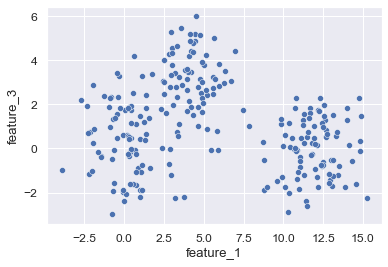

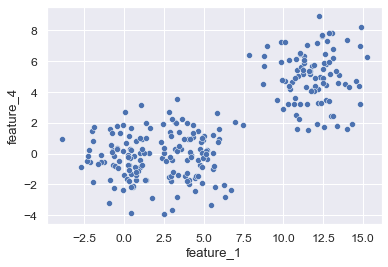

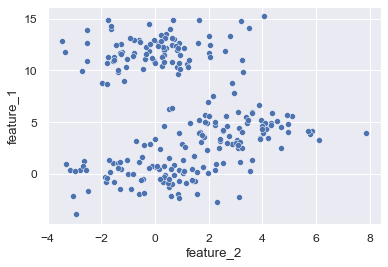

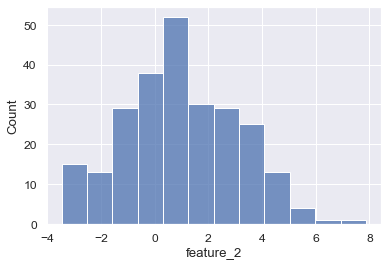

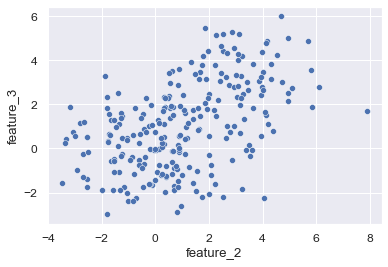

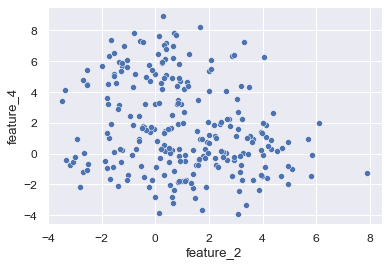

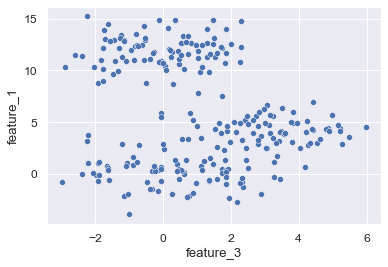

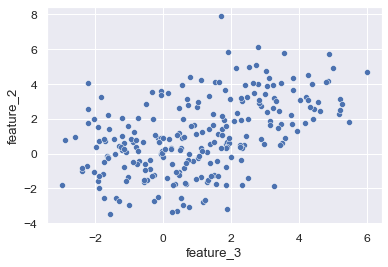

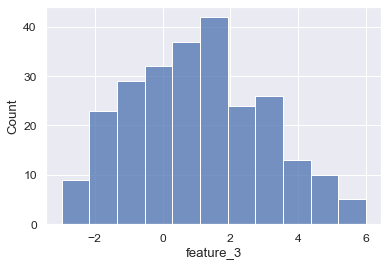

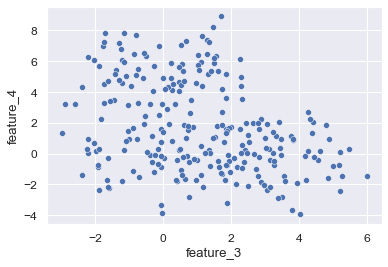

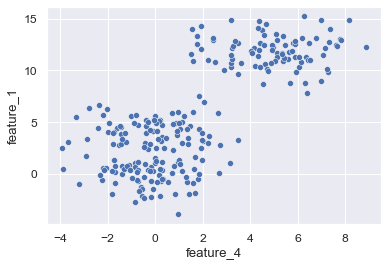

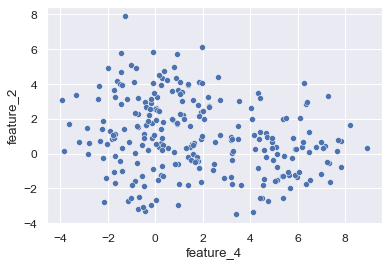

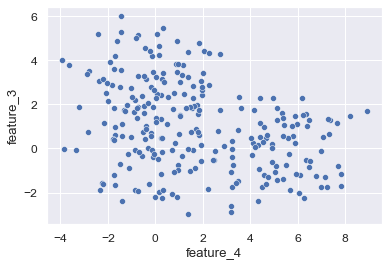

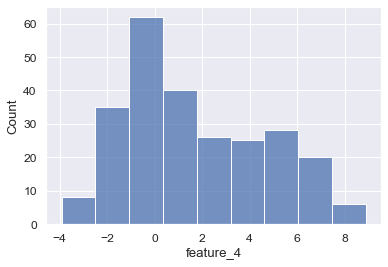

In [6]:
for f_1 in df_exemplo.columns:
    for f_2 in df_exemplo.columns:
        if(f_1 != f_2):
            sns.scatterplot(data=df_exemplo, x=f_1, y=f_2)
        else:
            sns.histplot(data=df_exemplo, x=f_1)
        plt.savefig(f'imagens/{f_1}-{f_2}.png')
        plt.show()

### 3 - Normalização 

In [7]:
std = StandardScaler()
normalized_df = std.fit_transform(df_exemplo)

### 4 - Modelo de aprendizado (K médias)

([<matplotlib.axis.XTick at 0x2835dbee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

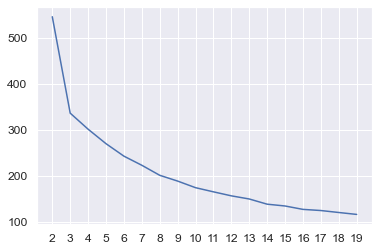

In [8]:
variance_intra_cluster = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_df)
    variance_intra_cluster.append(kmeans.inertia_)

sns.lineplot(x=list(range(2, 20)), y=variance_intra_cluster)
plt.xticks(list(range(2, 20)))

* Através do método do cotovelo podemos encontrar o número de k ideal como sendo 3

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=99999)
final_df['cluster'] = kmeans.fit_predict(normalized_df)

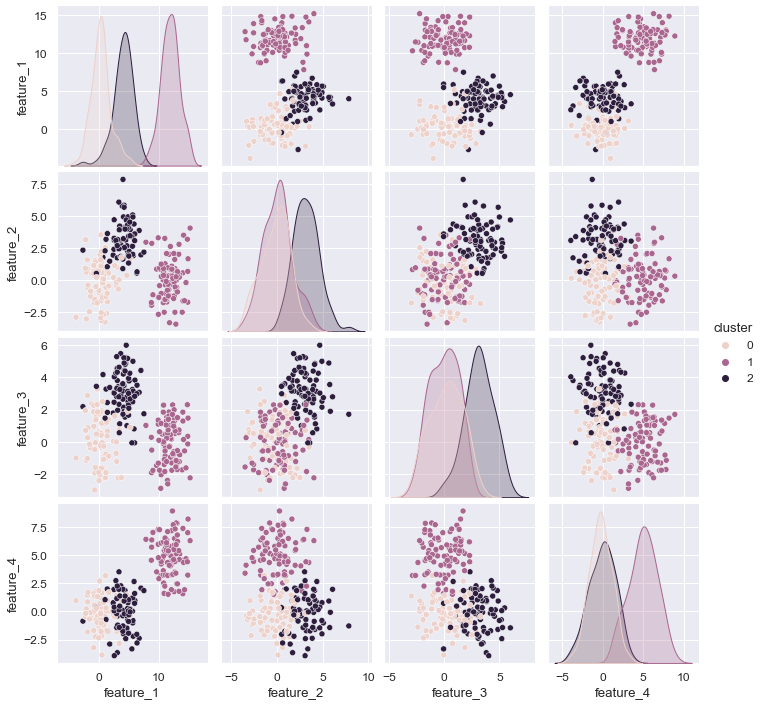

In [10]:
sns.set(font_scale=1.1)
sns.pairplot(final_df, hue='cluster')

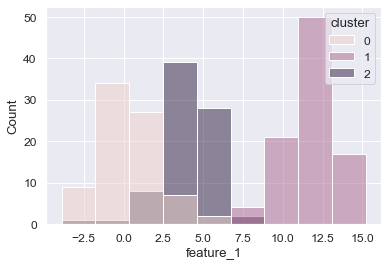

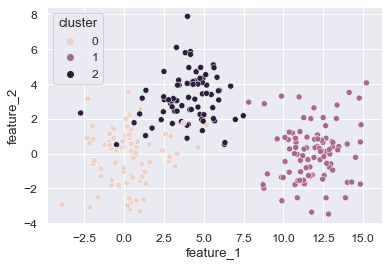

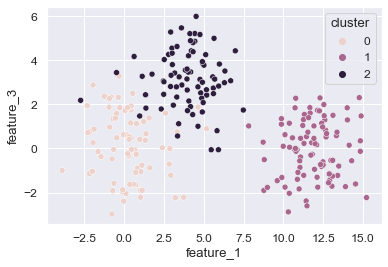

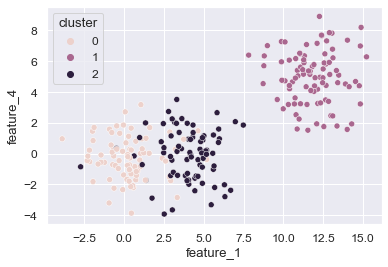

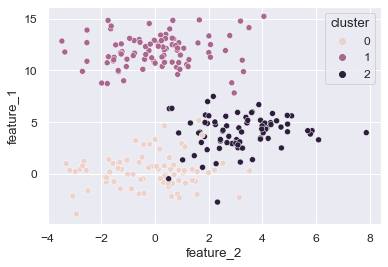

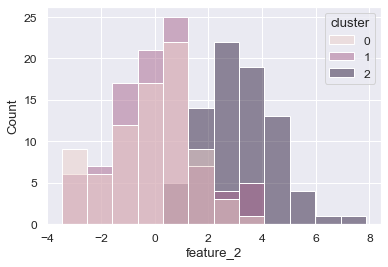

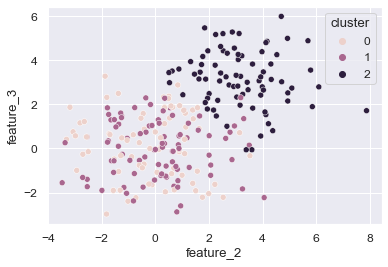

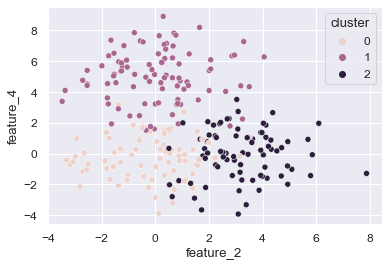

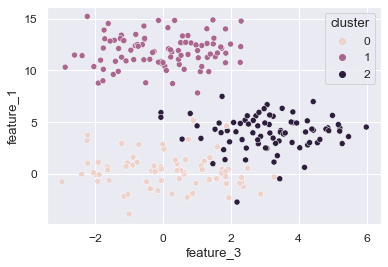

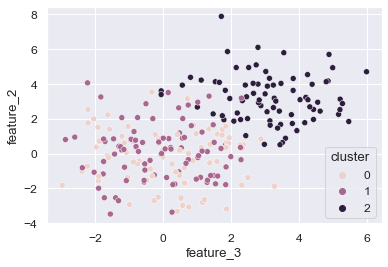

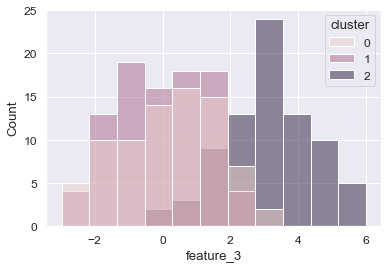

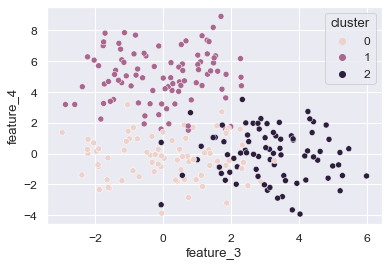

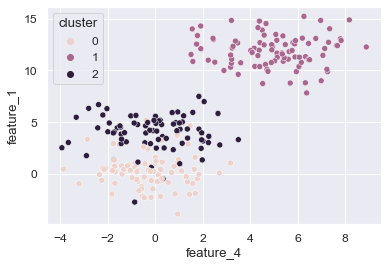

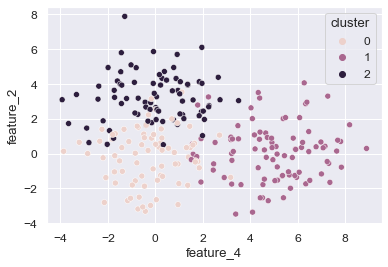

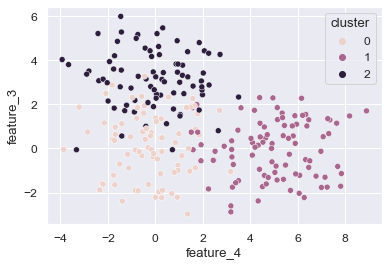

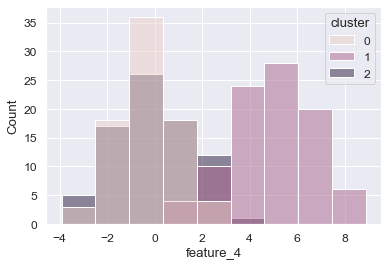

In [11]:
for f_1 in final_df.columns.drop('cluster'):
    for f_2 in final_df.columns.drop('cluster'):
        if(f_1 != f_2):
            sns.scatterplot(data=final_df, x=f_1, y=f_2, hue='cluster')
        else:
            sns.histplot(data=final_df, x=f_1, hue='cluster')
        plt.savefig(f'imagens/{f_1}-{f_2}.png')
        plt.show()

### 2 - Aplicação do PCA

In [12]:
pca = PCA()
pca.fit(df_exemplo)

PCA()

In [13]:
pca_df = pd.DataFrame(pca.transform(df_exemplo), columns=pca.get_feature_names_out())

In [14]:
pca_df

,pca0,pca1,pca2,pca3
0,9.014663,2.944879,2.240968,0.003442
1,7.143919,1.497167,-0.787538,-2.562291
2,9.503065,1.593300,-2.047818,1.245970
3,-8.559746,-0.025423,-0.011227,-1.225016
4,9.022529,0.599978,3.284294,-0.947608
...,...,...,...,...
245,7.613861,3.496610,3.115986,-0.520428
246,-3.612794,-2.081878,0.707301,2.523676
247,7.436250,0.928103,1.066544,-1.610851
248,1.490525,-1.672661,0.104781,0.160735


In [15]:
pca_df['cluster'] = final_df['cluster']

<AxesSubplot:xlabel='pca0', ylabel='pca1'>

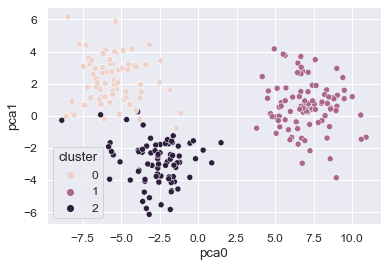

In [16]:
sns.scatterplot(data=pca_df, x='pca0', y='pca1', hue='cluster')

In [39]:
# fig = go.Figure(data=go.Scatter3d(pca_df.iloc[:3]))
# fig.update_layout(width=500, height=400, margin=dict(t=40, r=0, l=20, b=20))
# camera=dict(
#     up=dict(x=0, y=0, z=1),
#     center=dict(x=0, y=0, z=0),
#     eye=dict(x=1.25, y=1.25, z=1.25)
# )
# fig.update_layout(scene_camera=camera, title='Visualização tri-dimensional do PCA')
# fig.show()
px.scatter_3d(pca_df, x='pca0', y='pca1', z='pca2', color='cluster', width=1000, height=800)